# Training a logistic regression model

## TOY-EXAMPLE

## Training a logistic regression model using gradient descent

**Gradient descent** is an optimization algorithm used to minimize a function by iteratively moving towards the minimum value. It works by taking steps proportional to the negative of the function's gradient at the current point. The step size is determined by the learning rate. Mathematically, this can be expressed as:


image.png

where:
- $w$ is the parameter being updated.
- $\alpha$ is the learning rate.
- $\nabla f(w)$ is the gradient of the function $f$ with respect to $w$.

---


The decision threshold in logistic regression, typically 0.5, can be adjusted based on the cost of false positives and false negatives.

- **Lowering the threshold (e.g., to 0.3)**: This is useful when minimizing false negatives is crucial (e.g., predicting fire outbreaks). It increases the likelihood of predicting the positive class, even at the risk of more false positives.
- **Raising the threshold (e.g., to 0.7)**: This is useful when minimizing false positives is crucial (e.g., predicting product success for quality assurance). It decreases the likelihood of predicting the positive class, reducing false positives but potentially increasing false negatives.

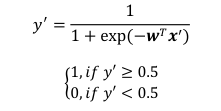

Understanding how to adjust the decision threshold is important for tailoring the logistic regression model to specific use cases and their associated risks.

1- **defining the function that computes the prediction image.png with the current weights** to founds

---

compute_prediction --> 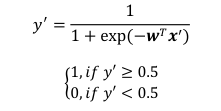

In [ ]:
import numpy as np

def sigmoid(z):
    """
    Compute the sigmoid function
    """
    return 1 / (1 + np.exp(-z))

def compute_prediction(X, weights):
    """
    Compute logistic regression predictions using current weights
    Args:
        X: Feature matrix (m samples x n features)
        weights: Current model weights (including bias if present)
    Returns:
        Sigmoid-activated predictions (probabilities between 0-1)
    """
    z = np.dot(X, weights)  # Linear combination of features and weights
    return sigmoid(z)  # Apply sigmoid to get probabilities

2- the function updating the weights, which is as follows,by one step in a gradient descent manner
---
update_weights_gd --> 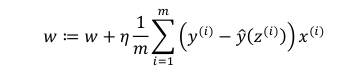

In [ ]:
# 2. Weight Update Function (Gradient Descent)
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights using gradient descent
    Args:
        X_train: Training features
        y_train: Training labels
        weights: Current model weights
        learning_rate: Step size for updates
    Returns:
        Updated weights after one gradient step
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)  # Compute gradient
    m = y_train.shape[0]  # Number of samples
    weights += learning_rate / float(m) * weights_delta  # Update weights
    return weights

 3- **the function calculating the cost J(w) is implemented as well**

 ---
### **Cross-Entropy Loss Function** -->
$$
J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

### **Components**:
1. **$\mathbf{w}$**: Weight vector (including bias term $w_0$ if present).
2. **$m$**: Number of training samples.
3. **$y^{(i)}$**: True label (0 or 1) for the $i$-th sample.
4. **$\hat{y}^{(i)}$**: Predicted probability for the $i$-th sample (output of sigmoid):
$$
\hat{y}^{(i)} = \sigma(\mathbf{w}^T \mathbf{x}^{(i)}) = \frac{1}{1 + e^{-\mathbf{w}^T \mathbf{x}^{(i)}}}
$$

### **Key Properties**:
1. **Per-Sample Cost**:
   - If $y^{(i)} = 1$: Cost $= -\log(\hat{y}^{(i)})$.
     - Penalizes small $\hat{y}^{(i)}$ (e.g., $\hat{y}^{(i)} \approx 0$ → cost $\to +\infty$).
   - If $y^{(i)} = 0$: Cost $= -\log(1 - \hat{y}^{(i)})$.
     - Penalizes large $\hat{y}^{(i)}$ (e.g., $\hat{y}^{(i)} \approx 1$ → cost $\to +\infty$).
2. **Convexity**: Guarantees a unique global minimum.
3. **Derivative**: Simplifies to $\nabla J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}$, enabling efficient gradient descent.


In [ ]:
# 3. Cost Function
def compute_cost(X, y, weights):
    """
    Compute cross-entropy cost (log loss)
    Args:
        X: Feature matrix
        y: True labels
        weights: Current model weights
    Returns:
        Current cost value
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

4- we connect all these functions to the model training function by executing the following:
•
Updating the weights vector in each iteration
•
Printing out the current cost for every 100 (this can be another value) iterations to
ensure cost is decreasing and that things are on the right track


---


### 1. Adding the Intercept Term (Bias)

```python
if fit_intercept:
    intercept = np.ones((X_train.shape[0], 1))  # Column vector of 1s
    X_train = np.hstack((intercept, X_train))
```

**Mathematical Representation:**
- Original feature matrix (without intercept):
  
  $$\mathbf{X} = \begin{bmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
  \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & \cdots & x_{m,n}
  \end{bmatrix}
  $$
- After adding intercept (bias term):

  
  $$\mathbf{X}_{\text{aug}} = \begin{bmatrix}
  1 & x_{1,1} & \cdots & x_{1,n} \\
  1 & x_{2,1} & \cdots & x_{2,n} \\
  \vdots & \vdots & \ddots & \vdots \\
  1 & x_{m,1} & \cdots & x_{m,n}
  \end{bmatrix}$$
  

**Purpose:**
- The added column of 1s corresponds to the bias term \( w_0 \) in the linear model:
  \[
  z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
  \]
- This allows the decision boundary to not be forced through the origin.

### 2. Weight Initialization

```python
weights = np.zeros(X_train.shape[1])
```

**Mathematical Representation:**
- If intercept was added:
  $$
  \mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
  $$
- Without intercept:
  $$
  \mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
  $$

**Purpose:**
- Zero initialization is a common starting point for logistic regression
- The gradient descent updates will adjust these weights to minimize the cost function
- For logistic regression, zero initialization works well because:
  - The sigmoid of 0 is 0.5 (neutral starting point)
  - The loss landscape is convex, so initialization isn't as crucial as in neural networks

### Why This Matters Mathematically

The complete linear component becomes:

$$
z = \mathbf{w}^T\mathbf{x} = \begin{cases}
w_0 + \sum_{j=1}^n w_jx_j & \text{if fit_intercept=True} \\
\sum_{j=1}^n w_jx_j & \text{if fit_intercept=False}
\end{cases}
$$

This affects:
1. The prediction: $$ \hat{y} = \sigma(z) $$
2. The gradient calculations
3. The final decision boundary

The intercept $$w_0$$ controls where the sigmoid "centers" its transition from 0 to 1, while the other weights $$w_1,...,w_n $$ control the orientation and steepness of the decision boundary.

In [ ]:
# 4. Training Function
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """
    Train logistic regression model using gradient descent
    Args:
        X_train: Training features
        y_train: Training labels
        max_iter: Maximum iterations
        learning_rate: Step size for updates
        fit_intercept: Whether to add bias term
    Returns:
        Learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))  # Add column of 1s for bias
        X_train = np.hstack((intercept, X_train))

    weights = np.zeros(X_train.shape[1])  # Initialize weights

    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)

        # Print cost every 100 iterations for monitoring
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))

    return weights

5- Finally, we predict the results of new inputs using the trained model as follows:

In [ ]:
# 5. Prediction Function for New Data
def predict(X, weights):
    """
    Make predictions on new data
    Args:
        X: New feature matrix
        weights: Trained model weights
    Returns:
        Predictions (probabilities)
    """
    if X.shape[1] == weights.shape[0] - 1:  # Check if need to add intercept
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

6- logistic regression is very simple, as you just saw. Let’s now examine it using a toy
example

In [ ]:
# Example Usage
X_train = np.array([[6, 7], [2, 4], [3, 6], [4, 7], [1, 6],
                   [5, 2], [2, 0], [6, 3], [4, 1], [7, 2]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

7-  We train a logistic regression model for 1000 iterations, at a learning rate of 0.1 based on intercept-in-
cluded weights:

In [ ]:
# Train model
weights = train_logistic_regression(X_train, y_train, max_iter=1000,
                                  learning_rate=0.1, fit_intercept=True)


0.5744042371657099
0.034460223392510314
0.018265572708476167
0.012493458388041119
0.00951532913854745
0.007693388060646946
0.0064620943335143306
0.005573511846832282
0.004901632254525041
0.004375567740665165


8- The decreasing cost means that the model is being optimized over time. We can check the model’s
performance on new samples as follows:

In [ ]:
# Make predictions
X_test = np.array([[6, 1], [1, 3], [3, 1], [4, 5]])
predictions = predict(X_test, weights)
print(predictions)

[0.9999478  0.00743991 0.9808652  0.02080847]


9- execute the following code using 0.5 as the classification decision threshold
---
Blue-filled crosses are testing samples predicted from class 0, while black-filled dots are those pre-
dicted from class 1:

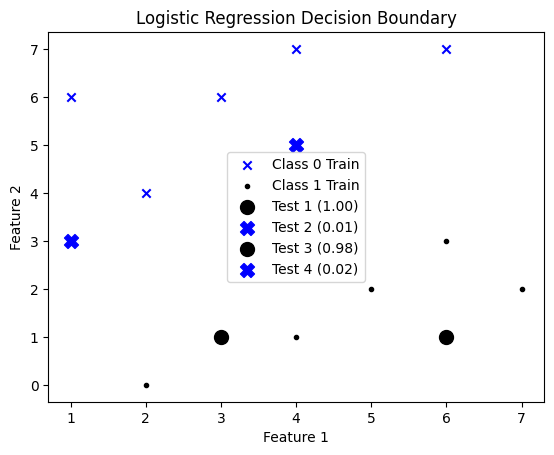

In [ ]:
import matplotlib.pyplot as plt

# Visualization
plt.scatter(X_train[:5,0], X_train[:5,1], c='b', marker='x', label='Class 0 Train')
plt.scatter(X_train[5:,0], X_train[5:,1], c='k', marker='.', label='Class 1 Train')

# Plot test predictions
for i, prediction in enumerate(predictions):
    marker = 'X' if prediction < 0.5 else 'o'
    c = 'b' if prediction < 0.5 else 'k'
    plt.scatter(X_test[i,0], X_test[i,1], c=c, marker=marker, s=100,
               label=f'Test {i+1} ({prediction:.2f})')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Predicting ad click-through with logistic regression using gradient descent

### REAL-DATA

click-through prediction project

In [ ]:
# %run "/content/drive/MyDrive/Colab Notebooks/Download_ad click-through.ipynb"

# Load the data into a pandas DataFrame
import pandas as pd
n_rows = 300000
df = pd.read_csv("train", nrows=n_rows)
df.head()

# Prepare data for modeling
Y = df['click'].values
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'],axis=1).values
n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)


Shape of X_train: (270000, 19)
Shape of Y_train: (270000,)
Shape of X_test: (30000, 19)
Shape of Y_test: (30000,)


train a logistic regression model over 10000 iterations, at a learning rate of 0.01 with bias

In [ ]:
X_train.shape

(270000, 19)

### better implementation of function train_logistic_regression and predict for big data of  click-through prediction project

it better implementation to solve the problem of compatibility of matrices

In [ ]:
import numpy as np

def sigmoid(z):
    """
    Compute the sigmoid function
    """
    return 1 / (1 + np.exp(-z))

def compute_prediction(X, weights):
    """
    Compute logistic regression predictions using current weights
    Args:
        X: Feature matrix (m samples x n features)
        weights: Current model weights (including bias if present)
    Returns:
        Sigmoid-activated predictions (probabilities between 0-1)
    """
    z = np.dot(X, weights)  # Linear combination of features and weights
    return sigmoid(z)  # Apply sigmoid to get probabilities

# 2. Weight Update Function (Gradient Descent)
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights using gradient descent
    Args:
        X_train: Training features
        y_train: Training labels
        weights: Current model weights
        learning_rate: Step size for updates
    Returns:
        Updated weights after one gradient step
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)  # Compute gradient
    m = y_train.shape[0]  # Number of samples
    weights += learning_rate / float(m) * weights_delta  # Update weights
    return weights
# 3. Cost Function
def compute_cost(X, y, weights):
    """
    Compute cross-entropy cost (log loss)
    Args:
        X: Feature matrix
        y: True labels
        weights: Current model weights
    Returns:
        Current cost value
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost
# 4. Training Function
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """
    Train logistic regression model using gradient descent
    Args:
        X_train: Training features (can be sparse matrix)
        y_train: Training labels
        max_iter: Maximum iterations
        learning_rate: Step size for updates
        fit_intercept: Whether to add bias term
    Returns:
        Learned weights
    """
    if fit_intercept:
        # Add column of 1s for bias to sparse matrix
        from scipy.sparse import hstack, csr_matrix
        intercept = csr_matrix(np.ones((X_train.shape[0], 1)))
        X_train = hstack([intercept, X_train])

    weights = np.zeros(X_train.shape[1])  # Initialize weights

    for iteration in range(max_iter):
        # Compute predictions using sparse matrix multiplication
        z = X_train.dot(weights)
        predictions = sigmoid(z)

        # Compute gradient using sparse matrix transpose dot product
        errors = y_train - predictions
        weights_delta = X_train.T.dot(errors)

        m = y_train.shape[0]  # Number of samples
        weights += learning_rate / float(m) * weights_delta  # Update weights

        # Print cost every 100 iterations for monitoring (convert to dense for cost calculation)
        if iteration % 100 == 0:
            # It's still necessary to convert to dense for cost calculation if compute_cost doesn't support sparse
            # If memory is still an issue, compute_cost would also need to be modified
            print(compute_cost(X_train.toarray(), y_train, weights))


    return weights

# 5. Prediction Function for New Data
def predict(X, weights):
    """
    Make predictions on new data
    Args:
        X: New feature matrix (can be sparse matrix)
        weights: Trained model weights
    Returns:
        Predictions (probabilities)
    """
    from scipy.sparse import hstack, csr_matrix
    # If X is a sparse matrix and weights include intercept, need to handle differently
    if isinstance(X, csr_matrix) and weights.shape[0] == X.shape[1] + 1:  # Check if need to add intercept
        intercept = csr_matrix(np.ones((X.shape[0], 1)))
        X = hstack((intercept, X))
    elif isinstance(X, np.ndarray) and weights.shape[0] == X.shape[1] + 1: # Handle dense with intercept
         intercept = np.ones((X.shape[0], 1))
         X = np.hstack((intercept, X))
    elif isinstance(X, np.ndarray) and X.ndim == 1 and weights.shape[0] == 2: # Handle single dense sample with intercept
         intercept = np.ones((1, 1))
         X = np.hstack((intercept, X.reshape(1, -1)))
    elif isinstance(X, np.ndarray) and X.ndim == 1 and weights.shape[0] == 1: # Handle single dense sample without intercept
         X = X.reshape(1, -1)


    # Use sparse matrix dot product if X is sparse
    if isinstance(X, csr_matrix):
      z = X.dot(weights)
    else: # Fallback for dense arrays
      z = np.dot(X, weights)

    return sigmoid(z)

### The start of running the project

In [ ]:
import timeit
start_time = timeit.default_timer()
weights =  train_logistic_regression(X_train_enc, # Pass sparse matrix directly
                                     Y_train,
                                     max_iter=10000, learning_rate=0.01,
                                     fit_intercept=True)

KeyboardInterrupt: 

In [ ]:
print(f"--- {(timeit.default_timer() - start_time) :.3f} seconds ---")

In [ ]:
pred = predict(X_test_enc, weights) # Removed .toarray()
from sklearn.metrics import roc_auc_score
print(f"Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}")

it taking a lot of time so Let’s look at a more efficient way to train a logistic regression model
in the next section. 32 minutes

### Training a logistic regression model using stochastic gradient descent (SGD)

This advanced version of gradient descent is called SGD. Expressed in a formula,

for each iteration, we do the following:

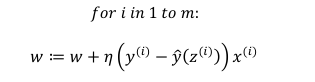




In [ ]:
def update_weights_sgd(X_train, y_train, weights, learning_rate):
    """Performs one epoch of stochastic gradient descent weight updates.

    Args:
        X_train (numpy.ndarray): Training features of shape (n_samples, n_features)
        y_train (numpy.ndarray): Training targets of shape (n_samples,)
        weights (numpy.ndarray): Current weights of shape (n_features,)
        learning_rate (float): Learning rate for weight updates

    Returns:
        numpy.ndarray: Updated weights
    """
    for X_each, y_each in zip(X_train, y_train):
        error = y_each - compute_prediction(X_each, weights)
        gradient = X_each * error  # X_each.T not needed for 1D array
        weights += learning_rate * gradient
    return weights

In [ ]:
import numpy as np
from scipy.sparse import hstack, csr_matrix

def sigmoid(z):
    """Compute the sigmoid function"""
    return 1 / (1 + np.exp(-z))

def compute_prediction(X, weights):
    """Compute logistic regression predictions"""
    if isinstance(X, csr_matrix):
        z = X.dot(weights)
    else:
        z = np.dot(X, weights)
    return sigmoid(z)

def update_weights_sgd(X_train, y_train, weights, learning_rate):
    """One weight update iteration using SGD"""
    for i in range(len(y_train)):
        X_each = X_train[i]
        y_each = y_train[i]
        prediction = compute_prediction(X_each, weights)
        weights_delta = (y_each - prediction) * X_each
        weights += learning_rate * weights_delta
    return weights

def compute_cost(X, y, weights):
    """Compute cross-entropy cost (log loss)"""
    predictions = compute_prediction(X, weights)
    # Clip predictions to avoid log(0)
    predictions = np.clip(predictions, 1e-15, 1-1e-15)
    cost = -np.mean(y * np.log(predictions) + (1-y) * np.log(1-predictions))
    return cost

def train_logistic_regression_sgd(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """Train logistic regression model via SGD"""
    if fit_intercept:
        if isinstance(X_train, csr_matrix):
            intercept = csr_matrix(np.ones((X_train.shape[0], 1)))
            X_train = hstack((intercept, X_train))
        else:
            intercept = np.ones((X_train.shape[0], 1))
            X_train = np.hstack((intercept, X_train))

    weights = np.zeros(X_train.shape[1])

    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)

        if iteration % 100 == 0:
            cost = compute_cost(X_train, y_train, weights)
            print(f"Iteration {iteration}: Cost = {cost:.6f}")

    return weights

def predict(X, weights, fit_intercept=False):
    """Make predictions on new data"""
    if fit_intercept:
        if isinstance(X, csr_matrix):
            intercept = csr_matrix(np.ones((X.shape[0], 1)))
            X = hstack((intercept, X))
        else:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))

    return compute_prediction(X, weights)

let's start again

In [ ]:
import timeit
start_time = timeit.default_timer()
weights = train_logistic_regression_sgd(X_train_enc,
                                        Y_train,
                                        max_iter=10,
                                        learning_rate=0.01,
                                        fit_intercept=True)
print(f"--- {(timeit.default_timer() - start_time)}.3fs seconds ---")

Iteration 0: Cost = 0.420111
--- 523.4835904829997.3fs seconds ---


In [ ]:
from sklearn.metrics import roc_auc_score
pred = predict(X_test_enc, weights, fit_intercept=True)
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')

Training samples: 270000, AUC on testing set: 0.765
